## Restaurant Reviews


### Problem Statement: Build a model which understands the customer review description and classifies whether it is a good restaurant or bad restaurant

## Load the Dataset

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
import pandas as pd
df = pd.read_csv('/kaggle/input/reviews/Restaurant_Reviews.tsv',sep='\t')
df.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


## Data Cleaning - Perform basic data quality checks

In [4]:
df.shape

(1000, 2)

In [5]:
# checking for missing values
df.isna().sum()

Review    0
Liked     0
dtype: int64

## Data Pre-Processing
### Data Extraction using TFIDF Vectorizer

### Removing any special characters or numbers from the column.

In [7]:
import re 
df['Review'] = df['Review'].str.lower()
pattern = r'[^a-z\s]'
df['Review'] = df['Review'].replace(pattern,'',regex=True)
df['Review']

0                                   wow loved this place
1                                      crust is not good
2               not tasty and the texture was just nasty
3      stopped by during the late may bank holiday of...
4      the selection on the menu was great and so wer...
                             ...                        
995    i think food should have flavor and texture an...
996                              appetite instantly gone
997    overall i was not impressed and would not go back
998    the whole experience was underwhelming and i t...
999    then as if i hadnt wasted enough of my life th...
Name: Review, Length: 1000, dtype: object

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf =  TfidfVectorizer()

X = tfidf.fit_transform(df['Review']).toarray()
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [9]:
X.shape

(1000, 2046)

In [10]:
Y = df[['Liked']]
Y.head()

,Liked
0,1
1,0
2,0
3,1
4,1


## Dividing the training dataset into train and test inorder to avoid overfitting model

In [11]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X,Y,train_size=0.75,test_size=0.25,random_state=21)

In [12]:
xtrain.shape

(750, 2046)

In [13]:
xtest.shape

(250, 2046)

In [14]:
ytrain.shape

(750, 1)

In [15]:
ytest.shape

(250, 1)

## Building Neural Network model to perform sentiment analysis

In [16]:
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.callbacks import EarlyStopping

In [17]:
nn = Sequential()

nn.add(Dense(256,input_dim=xtrain.shape[1],activation='relu'))
nn.add(Dropout(0.5))

nn.add(Dense(128,activation='relu'))
nn.add(Dropout(0.5))

nn.add(Dense(1,activation='sigmoid'))

In [18]:
nn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │       524,032 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 557,057 (2.13 MB)

 Trainable params: 557,057 (2.13 MB)

 Non-trainable params: 0 (0.00 B)

In [19]:
early_stop = EarlyStopping(monitor='val_loss',patience=10)

In [20]:
nn.compile(loss='mse',optimizer='adam',metrics=['accuracy'])

In [21]:
hist = nn.fit(xtrain,ytrain,
             validation_split=0.2,
             batch_size=8,
             epochs=100,
             callbacks=[early_stop])

Epoch 1/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.5406 - loss: 0.2499 - val_accuracy: 0.4667 - val_loss: 0.2468
Epoch 2/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7086 - loss: 0.2317 - val_accuracy: 0.8200 - val_loss: 0.2029
Epoch 3/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9027 - loss: 0.1292 - val_accuracy: 0.7867 - val_loss: 0.1471
Epoch 4/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9720 - loss: 0.0344 - val_accuracy: 0.7733 - val_loss: 0.1601
Epoch 5/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9844 - loss: 0.0154 - val_accuracy: 0.7400 - val_loss: 0.1702
Epoch 6/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9983 - loss: 0.0050 - val_accuracy: 0.8067 - val_loss: 0.1569
Epoch 7/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 0.0024 - val_accuracy: 0.7333 - val_loss: 0.1825
Epoch 8/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 0.0013 - val_accuracy: 0.7867 - v

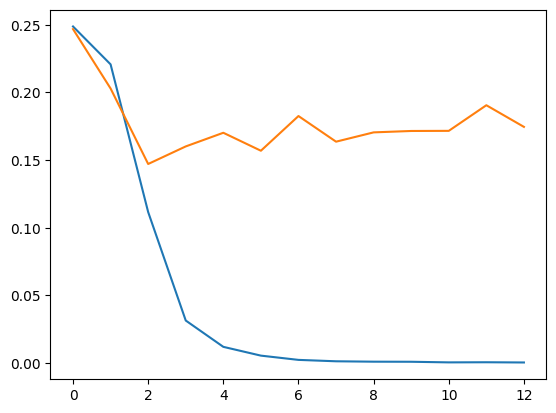

In [24]:
import matplotlib.pyplot as plt
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])

In [25]:
nn.evaluate(xtrain,ytrain)

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9924 - loss: 0.0062    


[0.03493479639291763, 0.9559999704360962]

In [26]:
nn.evaluate(xtest,ytest)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8405 - loss: 0.1169 


[0.1436527818441391, 0.800000011920929]

## Predicting test data

In [27]:
probs = nn.predict(xtest)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


In [28]:
preds= []
for i in probs:
    if i>=0.5:
        preds.append(1)
    else:
        preds.append(0)

In [29]:
preds[:10]

[0, 0, 1, 1, 1, 1, 0, 0, 0, 1]

In [30]:
ytest.head(10)

,Liked
492,0
383,0
856,1
834,1
603,1
712,1
126,0
290,0
549,1
169,1


## Evaluation : Confusion matrix

In [36]:
from sklearn.metrics import confusion_matrix
cf = confusion_matrix(ytest,preds)
cf

array([[ 97,  28],
       [ 22, 103]])

<Axes: >

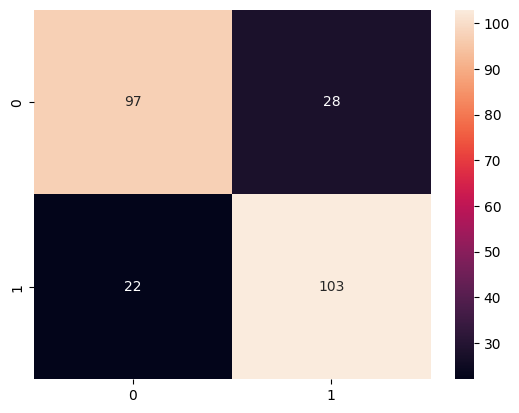

In [37]:
import seaborn as sns
sns.heatmap(cf,annot=True,fmt='d')

In [38]:
from sklearn.metrics import classification_report
print(classification_report(ytest,preds))

              precision    recall  f1-score   support

           0       0.82      0.78      0.80       125
           1       0.79      0.82      0.80       125

    accuracy                           0.80       250
   macro avg       0.80      0.80      0.80       250
weighted avg       0.80      0.80      0.80       250



## f1 score- macro avg is 80% . This is a good model. we can consider this for final predictions

------------------------------------------------------------------------------

## Predicting a given text

In [40]:
text = input('Enter any review : ')

Enter any review :  I recently visited Tatva, and my experience was delightful from start to finish. The ambiance was inviting, with warm lighting and comfortable seating that set the stage for a cozy dining experience.


In [44]:
text = text.lower()
text = re.sub(pattern,'',text)
print(f'Processed text: {text}')

Processed text: i recently visited tatva and my experience was delightful from start to finish the ambiance was inviting with warm lighting and comfortable seating that set the stage for a cozy dining experience


In [46]:
X_new = tfidf.transform([text]).toarray()
X_new

array([[0., 0., 0., ..., 0., 0., 0.]])

In [47]:
probs1 = nn.predict(X_new)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


In [52]:
if probs1>=0.5:
    print('The given review is Positive')
else:
    print('The given review is Negative')

The given review is Positive
